<a href="https://colab.research.google.com/github/Suraj-Kumar09/Machine_Learning_Projects/blob/main/Text_Dcuments/Text_Documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("falgunipatel19/biomedical-text-publication-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'biomedical-text-publication-classification' dataset.
Path to dataset files: /kaggle/input/biomedical-text-publication-classification


In [ ]:
import os

path = "/kaggle/input/biomedical-text-publication-classification"
print(os.listdir(path))

['alldata_1_for_kaggle.csv']


In [ ]:
data = pd.read_csv('/kaggle/input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv', encoding='latin1')


In [ ]:
display(data.head())

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [ ]:
# Rename columns
data = data.rename(columns={'0': 'label', 'a': 'text'})

# Check again
print(data.head())


   Unnamed: 0           label  \
0           0  Thyroid_Cancer   
1           1  Thyroid_Cancer   
2           2  Thyroid_Cancer   
3           3  Thyroid_Cancer   
4           4  Thyroid_Cancer   

                                                text  
0  Thyroid surgery in  children in a single insti...  
1  " The adopted strategy was the same as that us...  
2  coronary arterybypass grafting thrombosis ï¬b...  
3   Solitary plasmacytoma SP of the skull is an u...  
4   This study aimed to investigate serum matrix ...  


# Features & Labels


In [ ]:

X = data['text']
y = data['label']

# Split (with stratify to keep class balance)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Vectorize text (TF-IDF)

In [ ]:

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model

In [ ]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

# Predictions

In [ ]:

y_pred = model.predict(X_test_tfidf)

# Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 94.0554821664465

Classification Report:
                 precision    recall  f1-score   support

  Colon_Cancer       0.91      0.91      0.91       516
   Lung_Cancer       1.00      1.00      1.00       436
Thyroid_Cancer       0.92      0.92      0.92       562

      accuracy                           0.94      1514
     macro avg       0.94      0.94      0.94      1514
  weighted avg       0.94      0.94      0.94      1514



# Confusion Matrix

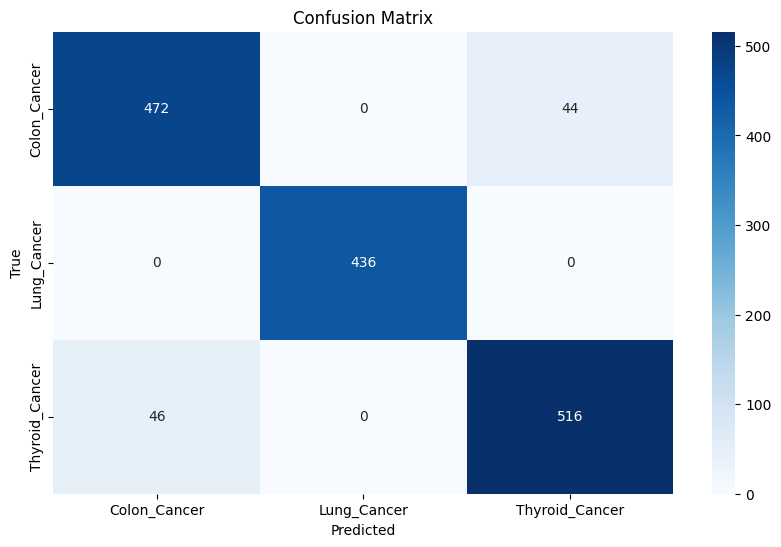

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier()
}

for name, clf in models.items():
    clf.fit(X_train_tfidf, y_train)
    acc = clf.score(X_test_tfidf, y_test)
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.9406
Naive Bayes: 0.8943
SVM: 0.9452
Random Forest: 1.0000


# Hyperparameter Tuning (GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9610298628179307


# Deep Learning with BERT

In [ ]:
!pip install transformers datasets torch

from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch



# Prepare dataset

In [ ]:
train_dataset = Dataset.from_dict({"text": X_train.tolist(), "label": y_train.factorize()[0]})
test_dataset = Dataset.from_dict({"text": X_test.tolist(), "label": y_test.factorize()[0]})

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize(batch):
    return tokenizer(batch['text'], padding='max_length', truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])



Map:   0%|          | 0/6056 [00:00<?, ? examples/s]

Map:   0%|          | 0/1514 [00:00<?, ? examples/s]

# Model

In [ ]:

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(set(y)))

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Training

In [ ]:

training_args = TrainingArguments(
    output_dir='./results', evaluation_strategy="epoch",
    per_device_train_batch_size=8, per_device_eval_batch_size=8,
    num_train_epochs=2, weight_decay=0.01
)

trainer = Trainer(
    model=model, args=training_args,
    train_dataset=train_dataset, eval_dataset=test_dataset
)

trainer.train()

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",         # <-- use eval_strategy
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:


Abort: 